In [1]:
import importlib
import model.trainer
import torch
import data.VCTK
importlib.reload(model.trainer)
importlib.reload(data.VCTK)

<module 'data.VCTK' from '/home/azureuser/dom/Project/data/VCTK.py'>

In [2]:
trainer = model.trainer.Trainer(
    device=torch.device("cuda"),
    checkpoint=306255,
    checkpoint_dir="checkpoints/tom",
    load_from_checkpoint=True
)

Using default model
Using default vocoder
Loading models from checkpoint 306255
Models loaded


In [3]:
dataset = model.trainer.get_dataset()

In [12]:
entry = dataset[1]
print(entry[0])

Now, suddenly, we have this new landscape.


In [13]:
pred = trainer.train_step(entry, eval=True)

In [14]:
spectros, wavs = entry[2], entry[1]
spectros_pred, wavs_pred = pred
spectros_pred, wavs_pred = spectros_pred.to("cpu").detach(), wavs_pred.to("cpu").detach()

print(spectros.shape, spectros_pred.shape)
print(wavs.shape, wavs_pred.shape)

torch.Size([3, 80, 129]) torch.Size([3, 80, 129])
torch.Size([3, 25600]) torch.Size([3, 25600])


In [15]:
print(wavs.shape, wavs_pred.shape)
wavs_stitched = wavs.view(1,-1)[0]
wavs_pred_stitched = wavs_pred.view(1,-1)[0]
print(wavs_stitched.shape, wavs_pred_stitched.shape)

torch.Size([3, 25600]) torch.Size([3, 25600])
torch.Size([76800]) torch.Size([76800])


In [17]:
import soundfile as sf
import pathlib
pathlib.Path("out").mkdir(exist_ok=True)

fname="tom"
sf.write(file=f"out/{fname}.wav", data=wavs_stitched.numpy(), samplerate=16000)
sf.write(file=f"out/{fname}_pred.wav", data=wavs_pred_stitched.numpy(), samplerate=16000)

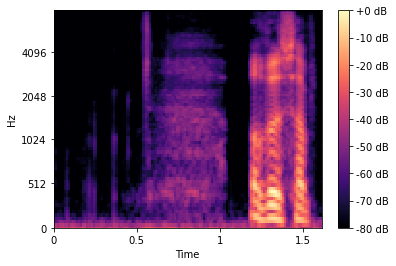

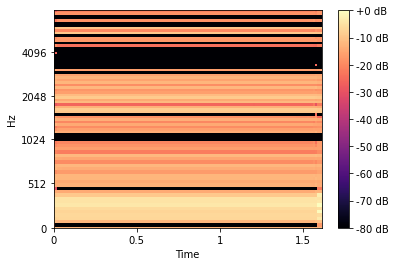

In [9]:
%matplotlib inline
dataset.show_spectros([spectros[0], spectros_pred[0]])

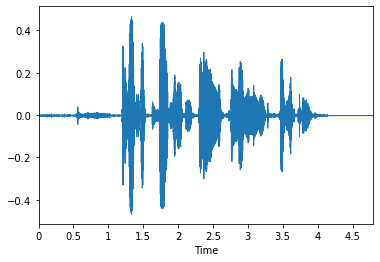

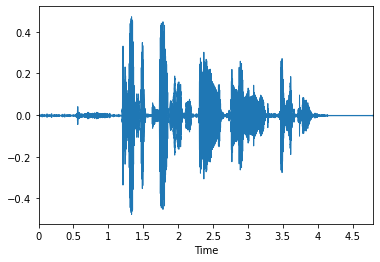

In [10]:
dataset.show_audios([wavs_stitched, wavs_pred_stitched])